# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [54]:
import pandas as pd

# Replace the path with the actual path of your CSV file
file_path = 'C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/Online Retail Data.csv'

# Load the data
retail_data_csv = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(retail_data_csv.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


# Task 2: Explore the Data

## Sales Trends Over Time

### How do sales vary by month?

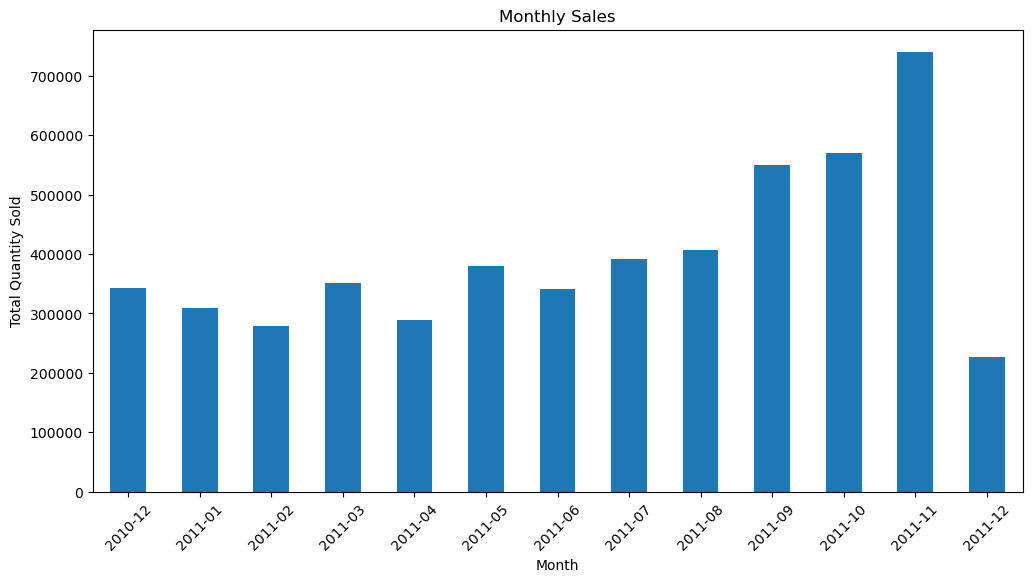

In [55]:
# Convert InvoiceDate to datetime and extract the month
retail_data_csv['InvoiceDate'] = pd.to_datetime(retail_data_csv['InvoiceDate'])
retail_data_csv['Month'] = retail_data_csv['InvoiceDate'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = retail_data_csv.groupby('Month')['Quantity'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


### Are there specific days of the week when sales peak?

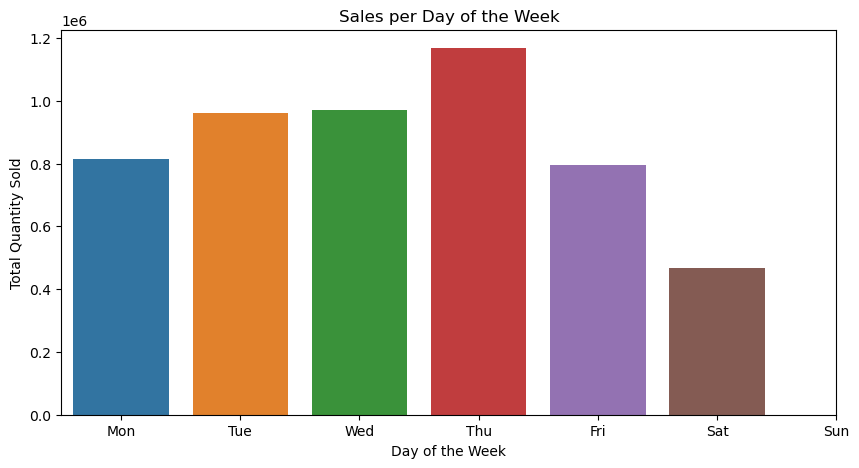

In [56]:
# Extract day of week from InvoiceDate (0 = Monday, 6 = Sunday)
retail_data_csv['DayOfWeek'] = retail_data_csv['InvoiceDate'].dt.dayofweek

# Calculate sales per day of the week
sales_per_day = retail_data_csv.groupby('DayOfWeek')['Quantity'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_per_day.index, y=sales_per_day.values)
plt.title('Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


## Product Analysis

### Which are the top-selling products?

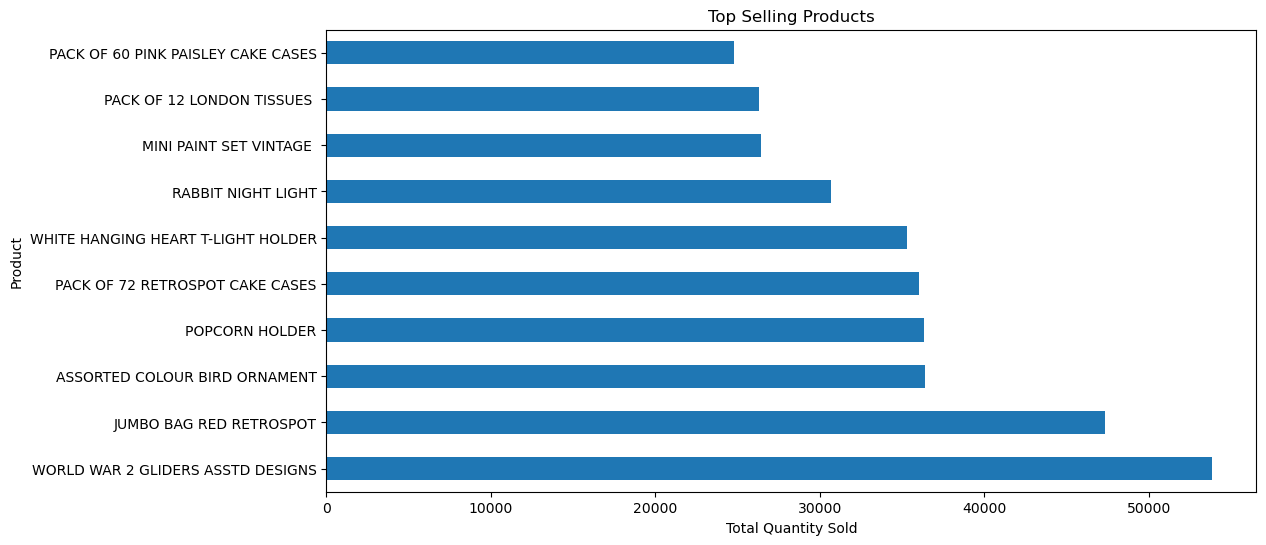

In [57]:
# Group by Description and sum the Quantity
top_products = retail_data_csv.groupby('Description')['Quantity'].sum().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
top_products.plot(kind='barh')
plt.title('Top Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()


## Customer Analysis

### Who are the top customers in terms of spending?

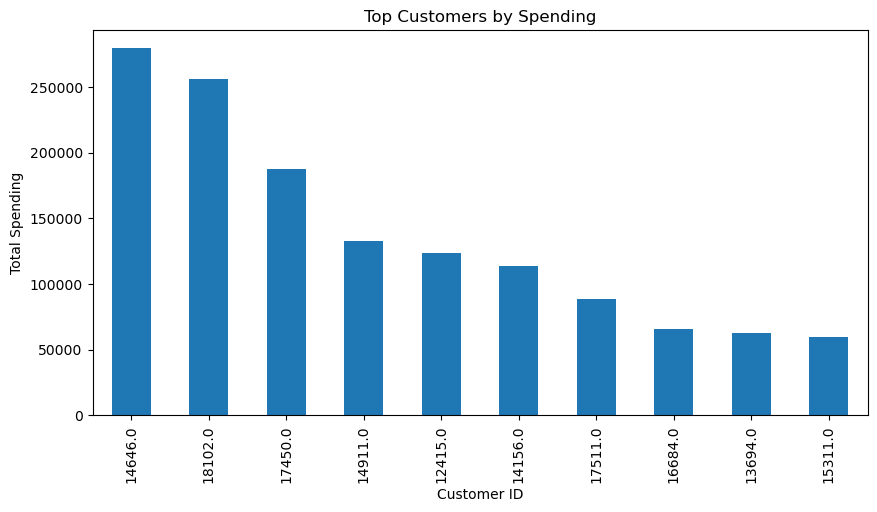

In [58]:
# Calculate total spending per customer
retail_data_csv['TotalPrice'] = retail_data_csv['Quantity'] * retail_data_csv['UnitPrice']
top_customers = retail_data_csv.groupby('CustomerID')['TotalPrice'].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 5))
top_customers.plot(kind='bar')
plt.title('Top Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()


## Price Analysis

### What is the distribution of product prices?

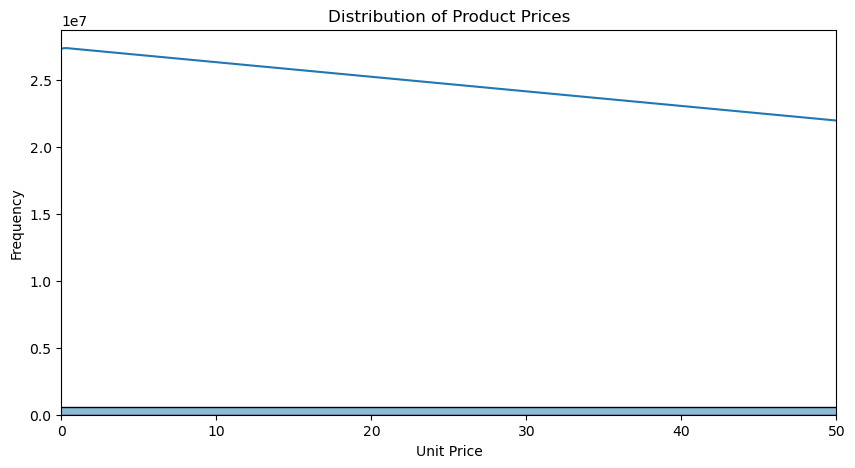

In [59]:
# Plot the distribution of UnitPrice
plt.figure(figsize=(10, 5))
sns.histplot(retail_data_csv['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Limiting x-axis for better clarity
plt.show()


## Order Patterns

### What is the average order value?

In [60]:
# Calculate total price for each invoice
retail_data_csv['TotalPrice'] = retail_data_csv['Quantity'] * retail_data_csv['UnitPrice']
average_order_value = retail_data_csv.groupby('InvoiceNo')['TotalPrice'].sum().mean()

# Display the average order value
print(f"Average Order Value: {average_order_value:.2f}")


Average Order Value: 376.36


### How does order size vary among customers?

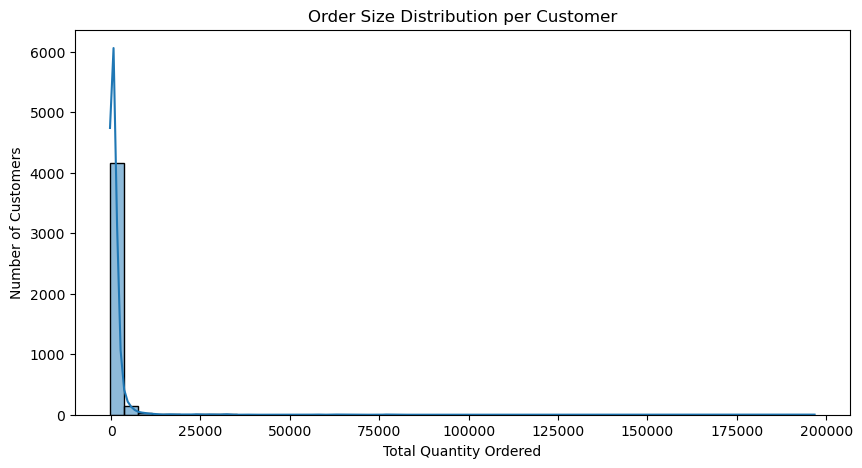

In [61]:
# Calculate total items per customer
order_size_per_customer = retail_data_csv.groupby('CustomerID')['Quantity'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(order_size_per_customer, bins=50, kde=True)
plt.title('Order Size Distribution per Customer')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Number of Customers')
plt.show()


## Geographic Insights

### Which countries contribute the most to sales?

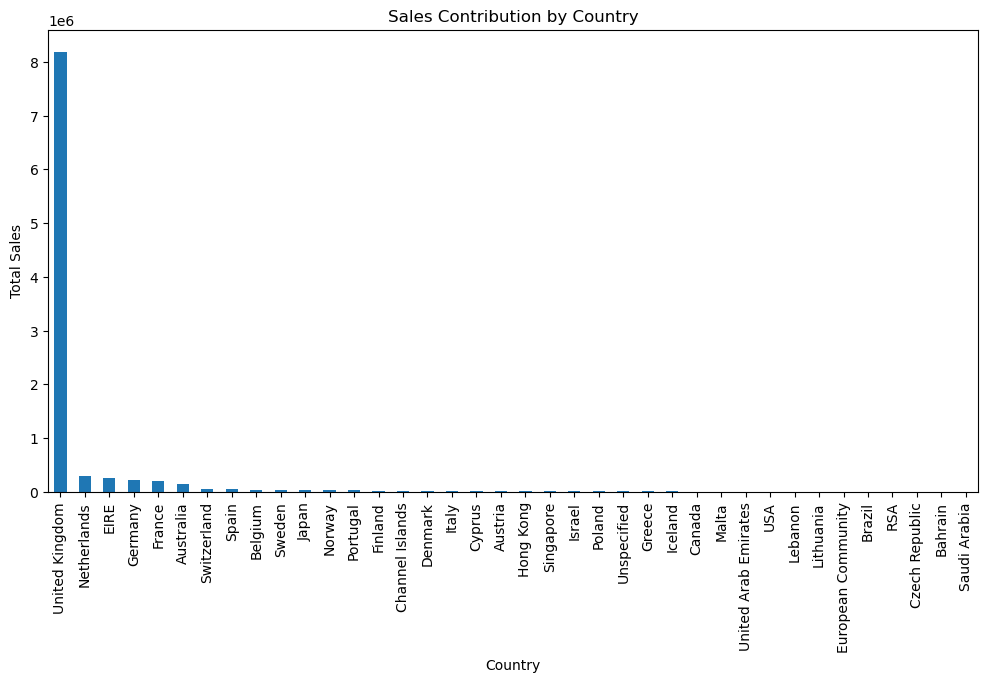

In [62]:
# Sum total sales per country
sales_per_country = retail_data_csv.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sales_per_country.plot(kind='bar')
plt.title('Sales Contribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


## Time Series Analysis

### Is there a trend in sales data over time?

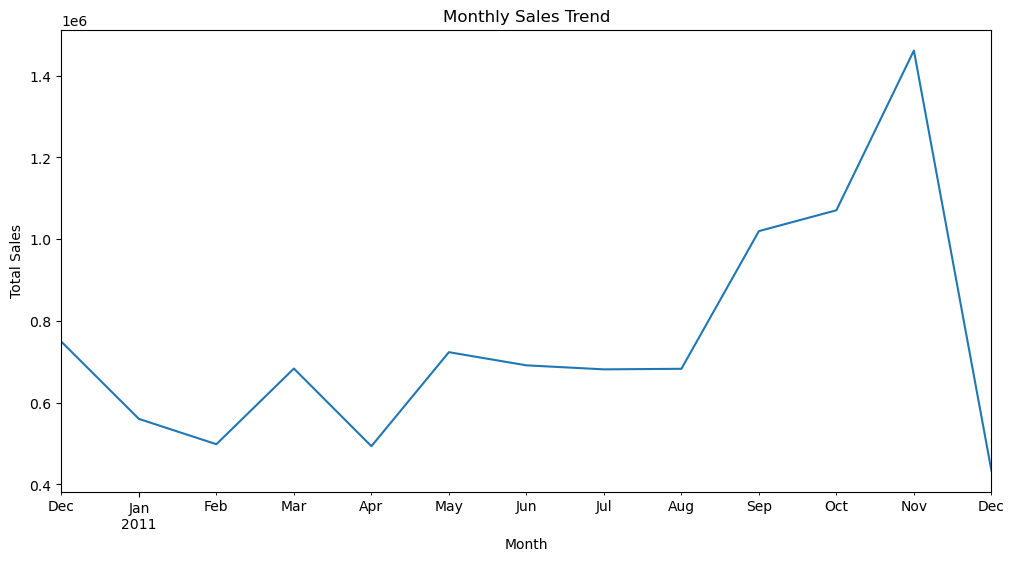

In [63]:
# Resample data monthly and sum total sales
monthly_trend = retail_data_csv.resample('M', on='InvoiceDate')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_trend.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


# Task 3 - Clean and Validate the Data

## Identifying Missing Data

In [64]:
# Checking for missing values in each column
missing_data = retail_data_csv.isnull().sum()
print("Missing data in each column:\n", missing_data)


Missing data in each column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Month               0
DayOfWeek           0
TotalPrice          0
dtype: int64


## Handling Missing Data

For the Items with Missing Description, it can be checked with listing down all Stock Code to the Description (and checking what Description have the most number in compare to the Stock Code)

LIke for StockCode 85175, there are 148 CACTI T-LIGHT CANDLES, so we can assume that Missing Description with 85175 as StockCode is CACTI T-LIGHT CANDLES

In [65]:
import pandas as pd

# Assuming retail_data_csv is your DataFrame
# Group by StockCode and Description, then count the occurrences
stockcode_description_count = retail_data_csv.groupby(['StockCode', 'Description']).size().reset_index(name='Count')

# Sorting by StockCode and Count (descending), so the most common Description appears first
stockcode_description_sorted = stockcode_description_count.sort_values(['StockCode', 'Count'], ascending=[True, False])

# Dropping duplicate StockCodes, keeping the first occurrence (the most common Description)
stockcode_description_mapping = stockcode_description_sorted.drop_duplicates(subset=['StockCode']).drop(columns=['Count'])

# Saving the mapping to a CSV file at the specified location
stockcode_description_mapping.to_csv('C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/StockCode_Mapping.csv', index=False)

# Display the first few rows of the mapping
print(stockcode_description_mapping.head())


  StockCode                  Description
0     10002  INFLATABLE POLITICAL GLOBE 
1     10080     GROOVY CACTUS INFLATABLE
3     10120                 DOGGY RUBBER
4    10123C        HEARTS WRAPPING TAPE 
5    10124A  SPOTS ON RED BOOKCOVER TAPE


In [66]:
# Converting the dictionary to a DataFrame
stockcode_description_df = pd.DataFrame(list(stockcode_description_mapping.items()), columns=['StockCode', 'Description'])

# Specify your desired file path
output_file_path = 'C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/StockCode_Mapping.csv'

# Saving the DataFrame to a CSV file named "StockCode_Mapping.csv"
stockcode_description_df.to_csv(output_file_path, index=False)

print(f"'StockCode_Mapping.csv' saved at {output_file_path}")


'StockCode_Mapping.csv' saved at C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/StockCode_Mapping.csv


Now we have a dictionary or mapping of the StockCode to the most common Description. Let us now handle the missing Description as well as other Description remarks concern.

In [67]:
# Ensure stockcode_description_mapping is a DataFrame
if isinstance(stockcode_description_mapping, pd.Series):
    stockcode_description_mapping = stockcode_description_mapping.reset_index()

# Create a dictionary for lookup
description_lookup = stockcode_description_mapping.set_index('StockCode')['Description'].to_dict()

# Fill missing descriptions
def fill_description(row):
    if pd.isna(row['Description']) and row['StockCode'] in description_lookup:
        return description_lookup[row['StockCode']]
    return row['Description']

retail_data_csv['Description'] = retail_data_csv.apply(fill_description, axis=1)


In [68]:
# Filter the DataFrame to find rows where 'Description' is still missing
rows_with_missing_description = retail_data_csv[retail_data_csv['Description'].isnull()]

# Display these rows
rows_with_missing_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,DayOfWeek,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,2010-12,2,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,2010-12,2,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,2010-12,2,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,2010-12,2,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,2010-12,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,2011-07,2,-0.0
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,2011-07,3,-0.0
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,2011-07,3,-0.0
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,2011-09,0,0.0


Upon verifying some of the missing Description in comparison to the StockCode, these Description were from the single observation.

In [69]:
# Filling missing descriptions with "No Description"
retail_data_csv['Description'].fillna("No Description", inplace=True)

# Verify if there are still missing descriptions
remaining_missing_descriptions = retail_data_csv['Description'].isnull().sum()
print("Remaining missing descriptions:", remaining_missing_descriptions)


Remaining missing descriptions: 0


## Fixing Structural Errors

### Handling Description with ?

For the incomplete items (e.g., '?', '? missing', '? sold as sets?'), which seems to represent uncertainty, I have utilized to replaced them with the common description (in relation to the corresponding StockCode)

In [70]:
# Replace uncertain descriptions with the most common description from the mapping
def replace_uncertain_descriptions(row):
    if '?' in row['Description']:
        return stockcode_description_df.get(row['StockCode'], 'No Description')
    else:
        return row['Description']

# Apply the function to the dataset
retail_data_csv['Description'] = retail_data_csv.apply(replace_uncertain_descriptions, axis=1)

# Save the cleaned data to a CSV file
cleaned_file_path = 'C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/Online Retail Data - Cleaned.csv'
retail_data_csv.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/Online Retail Data - Cleaned.csv


### Handling Description with "Check"

There are Description which have only "check" this could mean that it should checked compared to the Stock Code



### Handling Null Client Data

For the Missing Client Data, there have been no clear distinction on how it can be adjusted. Until additional data has been received, will be retaining the current information.

## Duplicate Data

Let's check if there have been multiple data that we need to drop. If there is a data, we will drop it.

In [71]:
# Counting the number of duplicate rows in the dataset
duplicate_count = retail_data_csv.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Removing the duplicate rows
retail_data_cleaned = retail_data_csv.drop_duplicates()

# Saving the cleaned data to a new CSV file
cleaned_file_path = 'C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/Online Retail Data - Cleaned.csv'
retail_data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Data cleaned and saved to: {cleaned_file_path}")

# Check if the duplicated rows have been removed
duplicate_count = retail_data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 5268
Data cleaned and saved to: C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/Online Retail Data - Cleaned.csv
Number of duplicate rows: 0


### Handling Prices with No Value

Utilized the average price per corresponding StockCode and Country.

In [72]:
import pandas as pd

# Calculate average unit price for each StockCode and Country combination, excluding zero prices
average_prices_raw = retail_data_cleaned[retail_data_cleaned['UnitPrice'] > 0].groupby(['StockCode', 'Country'])['UnitPrice'].mean().reset_index(name='AverageUnitPrice')

# Merging to get the Description for each StockCode
average_price_data_raw = average_prices_raw.merge(retail_data_cleaned[['StockCode', 'Description', 'Country']].drop_duplicates(), on=['StockCode', 'Country'])

# Selecting relevant columns
average_price_data_raw = average_price_data_raw[['StockCode', 'Description', 'AverageUnitPrice', 'Country']]

# Save this data to a CSV file
average_price_output_file = 'C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/Average_UnitPrice_by_StockCode_and_Country_Raw.csv'
average_price_data_raw.to_csv(average_price_output_file, index=False)

# Replace zero prices in the original dataset
retail_data_csv = retail_data_csv.merge(average_prices_raw, on=['StockCode', 'Country'], how='left')
retail_data_csv['UnitPrice'] = retail_data_csv.apply(lambda row: row['AverageUnitPrice'] if row['UnitPrice'] == 0 else row['UnitPrice'], axis=1)

# Drop the 'AverageUnitPrice' column after replacement
retail_data_csv.drop(columns=['AverageUnitPrice'], inplace=True)

print(f"Average unit price data saved to: {average_price_output_file}")


Average unit price data saved to: C:/Users/COMPUTER/Desktop/perform-exploratory-data-analysis-on-retail-data-with-python/Online Retail Data/Average_UnitPrice_by_StockCode_and_Country_Raw.csv


# Task 4 - Analyze the Data

## Analyze Sales Trends Over Time

### Busiest Months

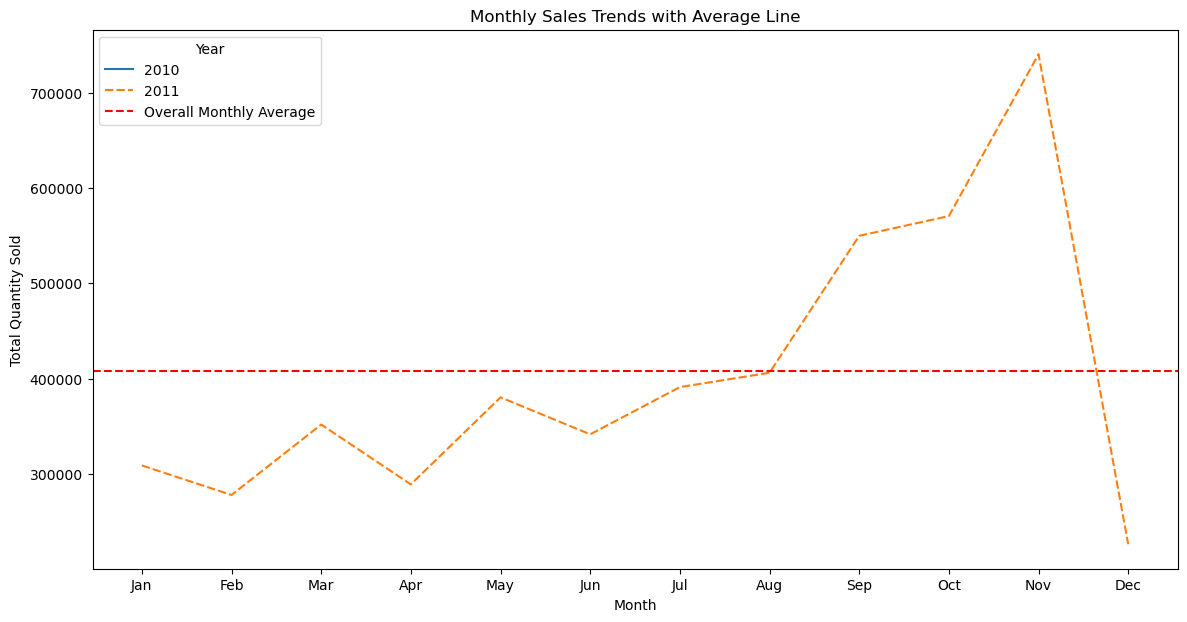

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'InvoiceDate' to datetime
retail_data_csv['InvoiceDate'] = pd.to_datetime(retail_data_csv['InvoiceDate'])

# Extract year and month for grouping
retail_data_csv['Year'] = retail_data_csv['InvoiceDate'].dt.year
retail_data_csv['Month'] = retail_data_csv['InvoiceDate'].dt.month

# Group by year and month, then sum quantities
monthly_sales = retail_data_csv.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Pivot table to have months on the x-axis and years as separate lines
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='Quantity')


# Calculate the overall monthly average (across years)
monthly_avg = monthly_sales.groupby('Month')['Quantity'].mean()

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales_pivot)

# Add a line for the average quantity sold per month across all years
plt.axhline(monthly_avg.mean(), color='red', linestyle='--', label='Overall Monthly Average')

# Set labels and title
plt.ylabel('Total Quantity Sold')
plt.xlabel('Month')
plt.title('Monthly Sales Trends with Average Line')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show legend
plt.legend(title='Year')
plt.show()


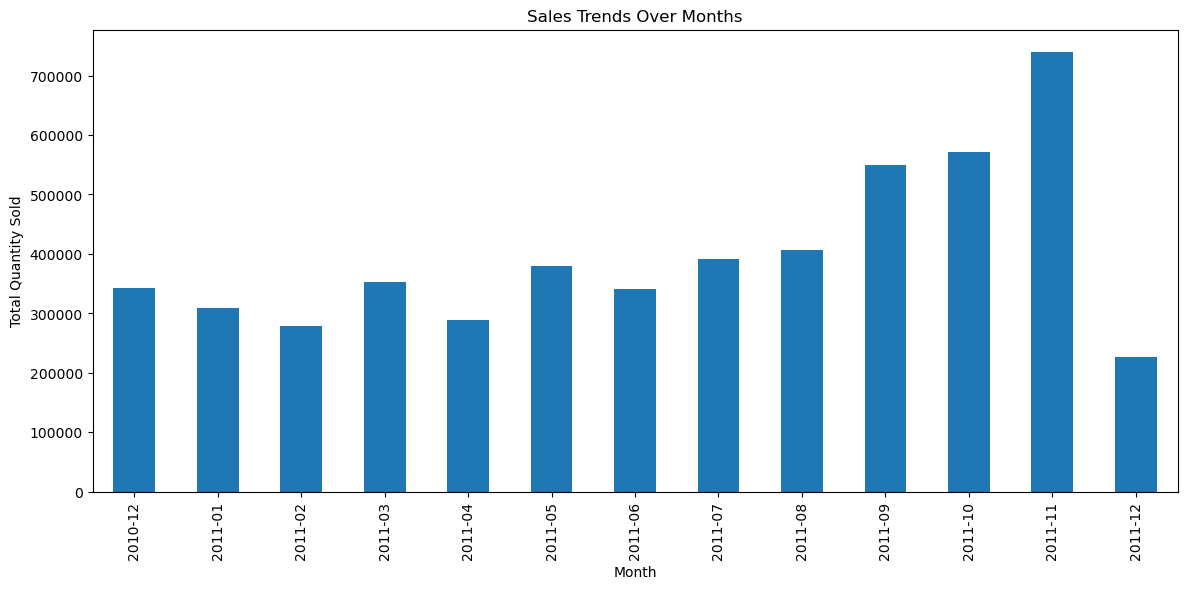

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'InvoiceDate' is a datetime type
retail_data_csv['InvoiceDate'] = pd.to_datetime(retail_data_csv['InvoiceDate'])

# Extract year and month
retail_data_csv['YearMonth'] = retail_data_csv['InvoiceDate'].dt.to_period('M')

# Group data by YearMonth and sum the Quantity sold
sales_trends_monthly = retail_data_csv.groupby('YearMonth')['Quantity'].sum().sort_index()

# Plotting
plt.figure(figsize=(14, 6))
sales_trends_monthly.plot(kind='bar')
plt.title('Sales Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


### Busiest Days of the Week

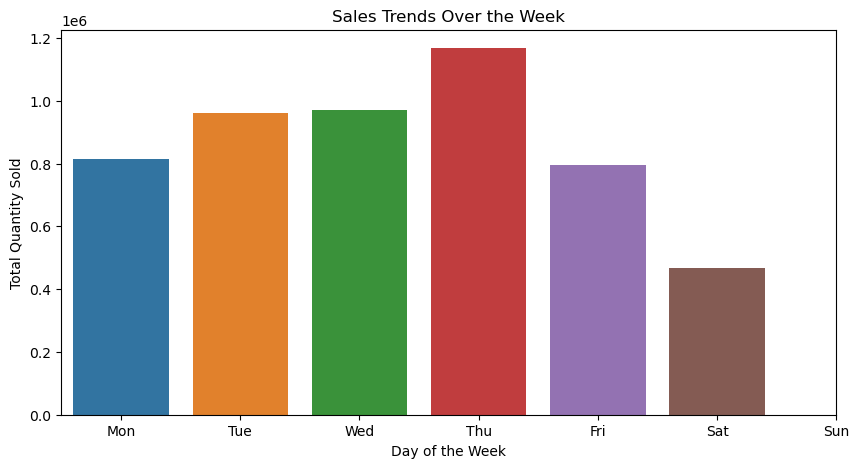

In [75]:
# Extract day of the week (0=Monday, 6=Sunday)
retail_data_csv['DayOfWeek'] = retail_data_csv['InvoiceDate'].dt.dayofweek

# Group data by DayOfWeek and sum the Quantity sold
sales_trends_weekly = retail_data_csv.groupby('DayOfWeek')['Quantity'].sum()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_trends_weekly.index, y=sales_trends_weekly.values)
plt.title('Sales Trends Over the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


## Explore Top-Selling Products and Countries

### Top-Selling Products

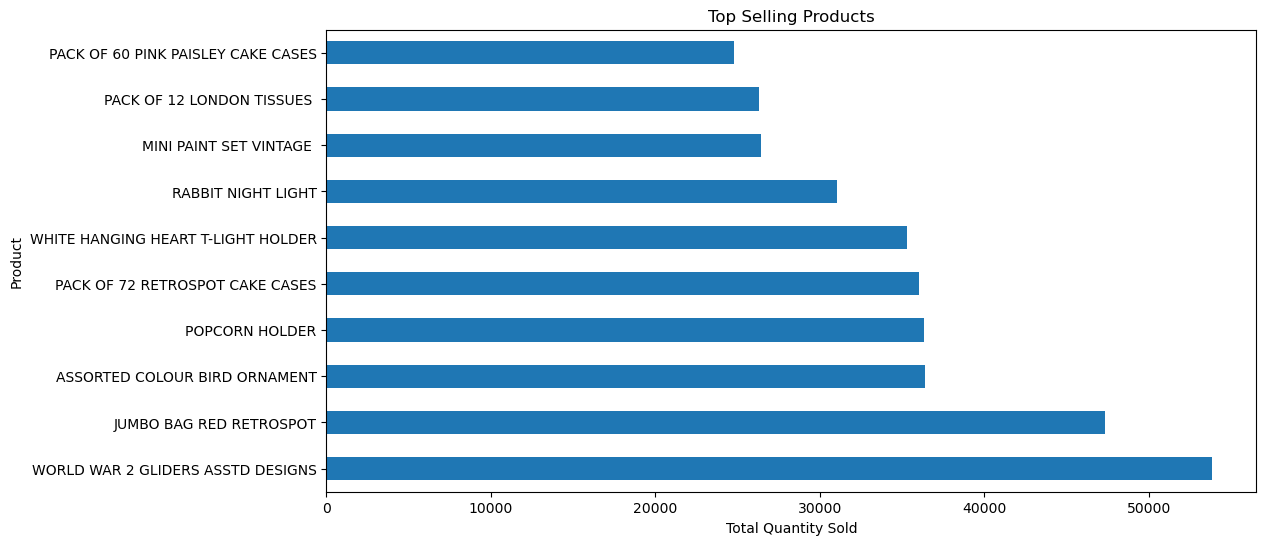

In [76]:
# Group by Description and sum the Quantity, then take the top 10
top_products = retail_data_csv.groupby('Description')['Quantity'].sum().nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
top_products.plot(kind='barh')
plt.title('Top Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()


### Top Countries by Sales Volume

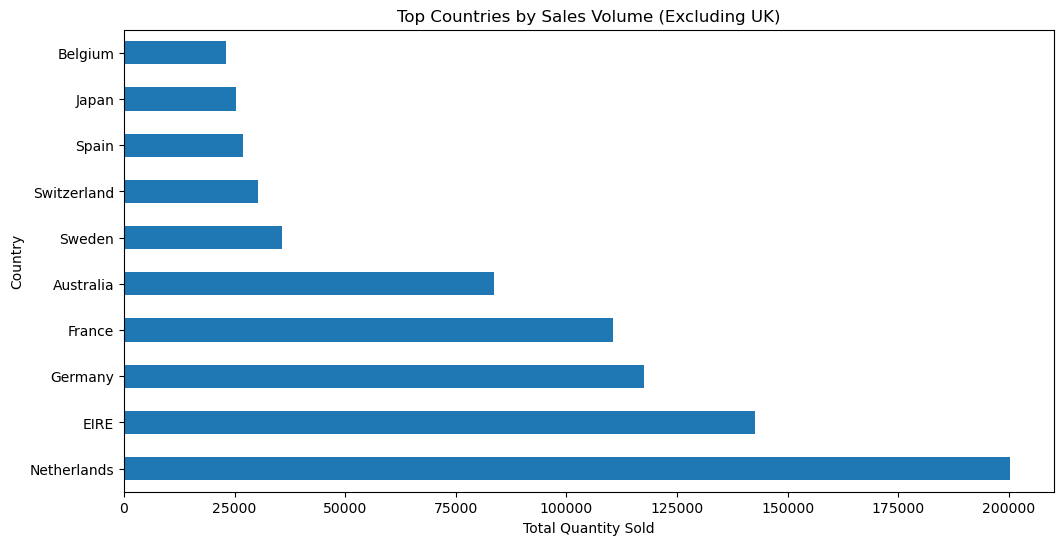

In [77]:
# Group by Country and sum the Quantity, then take the top 10 excluding 'United Kingdom'
top_countries = retail_data_csv[retail_data_csv['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
top_countries.plot(kind='barh')
plt.title('Top Countries by Sales Volume (Excluding UK)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()


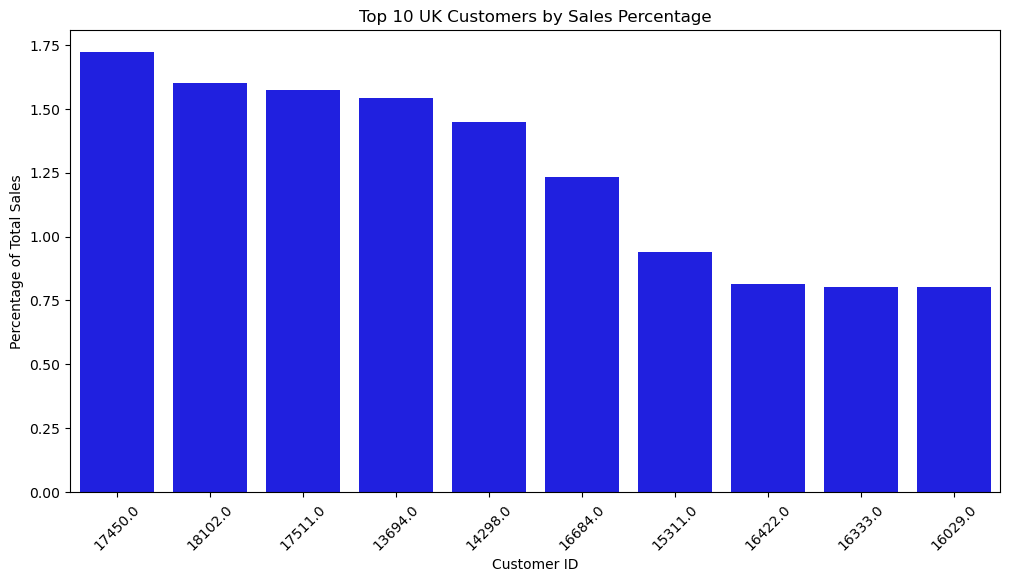

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming retail_data_csv is already loaded

# Filtering data for only UK customers
uk_data = retail_data_csv[retail_data_csv['Country'] == 'United Kingdom']

# Grouping by CustomerID and summing up their total sales
uk_customer_sales = uk_data.groupby('CustomerID')['Quantity'].sum().reset_index()

# Calculating the total sales for normalization
total_uk_sales = uk_customer_sales['Quantity'].sum()

# Calculating the percentage of total sales per customer
uk_customer_sales['SalesPercentage'] = (uk_customer_sales['Quantity'] / total_uk_sales) * 100

# Sorting data for better visualization and taking top 10 customers
top_uk_customers = uk_customer_sales.sort_values('SalesPercentage', ascending=False).head(10)

# Plotting bar chart in descending order
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='SalesPercentage', data=top_uk_customers, order=top_uk_customers['CustomerID'], color='blue')
plt.title('Top 10 UK Customers by Sales Percentage')
plt.xlabel('Customer ID')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=45)
plt.show()


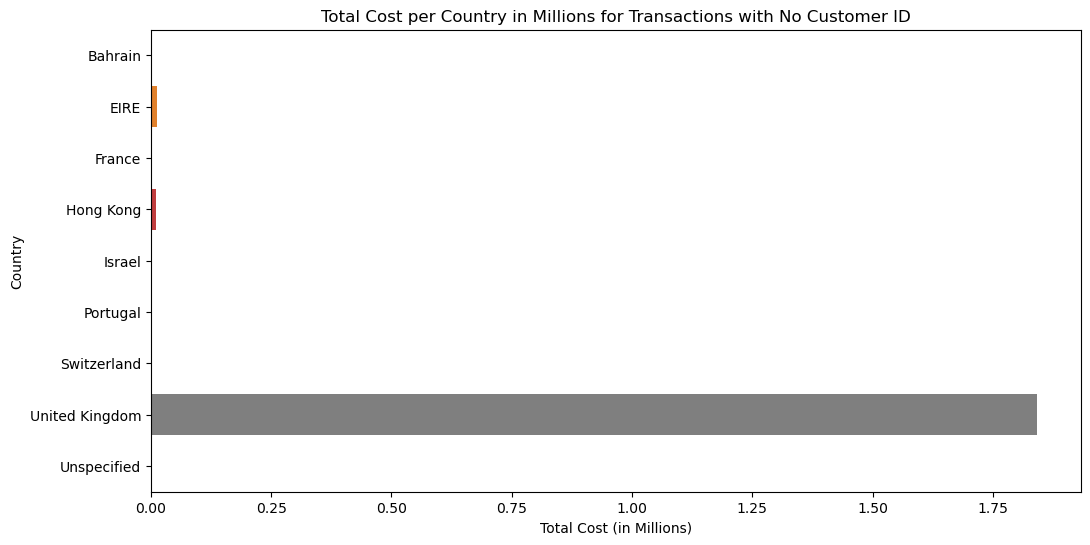

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming retail_data_csv is already loaded

# Creating a copy of the data for transactions with no Customer ID
no_id_data = retail_data_csv[retail_data_csv['CustomerID'].isna()].copy()

# Calculating the total cost (Quantity * UnitPrice) per transaction
no_id_data['TotalCost'] = no_id_data['Quantity'] * no_id_data['UnitPrice']

# Grouping by Country and summing the TotalCost, then converting to millions
cost_per_country = no_id_data.groupby('Country')['TotalCost'].sum().reset_index()
cost_per_country['TotalCostMillions'] = cost_per_country['TotalCost'] / 1e6

# Plotting bar chart for cost per country in millions
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalCostMillions', y='Country', data=cost_per_country)
plt.title('Total Cost per Country in Millions for Transactions with No Customer ID')
plt.xlabel('Total Cost (in Millions)')
plt.ylabel('Country')
plt.show()


## Identify Outliers or Anomalies

For the outlier let's analyze the price for the outlier amount. We will observe a subset of the sample.

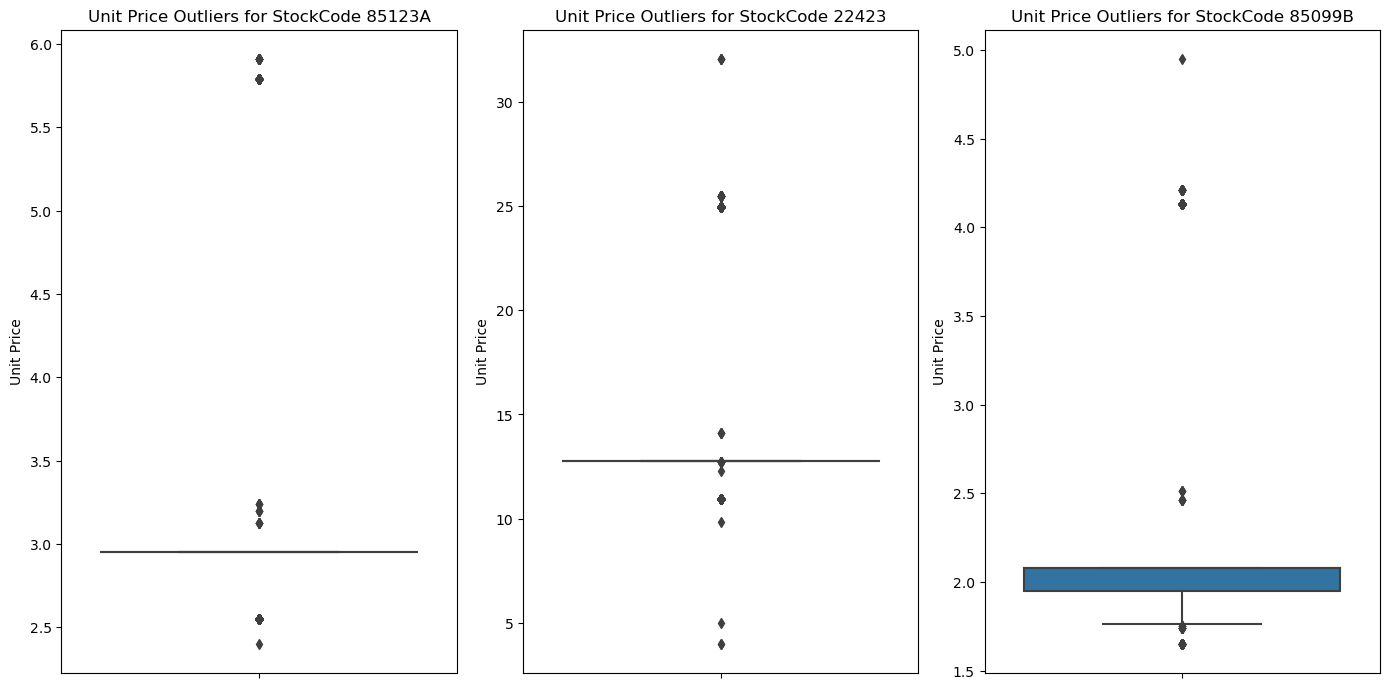

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming retail_data_csv is already loaded

# Let's choose two sample StockCodes for analysis
sample_stockcodes = retail_data_csv['StockCode'].value_counts().index[:3].tolist()

# Plotting boxplots for UnitPrice by StockCode to identify outliers
plt.figure(figsize=(14, 7))
for i, stockcode in enumerate(sample_stockcodes, start=1):
    plt.subplot(1, 3, i)
    subset = retail_data_csv[retail_data_csv['StockCode'] == stockcode]
    sns.boxplot(y=subset['UnitPrice'])
    plt.title(f'Unit Price Outliers for StockCode {stockcode}')
    plt.ylabel('Unit Price')

plt.tight_layout()
plt.show()



# Task 5 - Findings and Conclusion

Based on our findings, the UK emerges as the market with the highest sales volume, highlighted by Customer ID 17450 as the most significant buyer. This presents an opportunity to strategically engage with the top 5 customers to enhance their spending by closely analyzing our sales interactions with them and identifying potential areas for growth. 

Additionally, by comparing the sales patterns of the next top customers (ranked 6 to 10) against sales in other countries like the Netherlands, EIRE, Germany, and France, we can assess whether to continue focusing intensively on the UK market or to prioritize expansion into these other promising regions. 

However, a notable challenge lies in the missing customer ID data, which hampers our ability to track customer activity accurately and prioritize efforts effectively. Implementing a robust system to capture and manage this data is crucial. 

Furthermore, the establishment of a centralized system for managing stock codes and descriptions is essential for accurate data tracking and effective stock management. Also, conducting a thorough cost analysis will aid in developing a refined pricing strategy. Including customer feedback and market research into our strategic planning can provide deeper insights into customer preferences and market trends, enhancing product offerings and customer satisfaction. 

Overall, a comprehensive approach that encompasses customer segmentation, detailed sales trend analysis, product performance evaluation, and an exploration of international markets, complemented by efficient data management and customer engagement strategies, is imperative for informed decision-making and strategic business growth.
